In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [119]:
df=pd.read_csv("Student_Performance.csv")
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [120]:
df.columns

Index(['student_id', 'age', 'gender', 'school_type', 'parent_education',
       'study_hours', 'attendance_percentage', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'math_score',
       'science_score', 'english_score', 'overall_score', 'final_grade'],
      dtype='object')

In [121]:
df.info()
n_df=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [122]:
df['student_id'].duplicated().sum()

np.int64(10000)

In [123]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [124]:
df.drop_duplicates(subset='student_id', inplace=True)
df.shape

(15000, 16)

In [125]:
x=pd.get_dummies(df.drop(columns=['overall_score','final_grade']))
y=df['overall_score']

In [126]:
print(x.shape,y.shape)
x

(15000, 32) (15000,)


,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,gender_female,gender_male,gender_other,...,travel_time_<15 min,travel_time_>60 min,extra_activities_no,extra_activities_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_notes,study_method_online videos,study_method_textbook
0,1,14,3.1,84.3,42.7,55.4,57.0,False,True,False,...,True,False,False,True,False,False,False,True,False,False
1,2,18,3.7,87.8,57.6,68.8,64.8,True,False,False,...,False,True,True,False,False,False,False,False,False,True
2,3,17,7.9,65.5,84.8,95.0,79.2,True,False,False,...,True,False,True,False,False,False,False,True,False,False
3,4,16,1.1,58.1,44.4,27.5,54.7,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,5,16,1.3,61.0,8.9,32.7,30.0,True,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,17,1.8,53.2,37.1,37.1,26.8,False,True,False,...,False,False,True,False,False,True,False,False,False,False
14996,14997,17,6.7,63.5,84.4,67.2,96.2,False,False,True,...,True,False,False,True,False,False,True,False,False,False
14997,14998,17,5.2,58.2,69.0,57.2,74.1,False,True,False,...,False,False,True,False,False,True,False,False,False,False
14998,14999,16,1.0,68.7,24.2,41.4,30.5,False,False,True,...,False,False,False,True,False,False,False,False,False,True


In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [140]:
print(x.columns)

Index(['student_id', 'age', 'study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'gender_female',
       'gender_male', 'gender_other', 'school_type_private',
       'school_type_public', 'parent_education_diploma',
       'parent_education_graduate', 'parent_education_high school',
       'parent_education_no formal', 'parent_education_phd',
       'parent_education_post graduate', 'internet_access_no',
       'internet_access_yes', 'travel_time_15-30 min', 'travel_time_30-60 min',
       'travel_time_<15 min', 'travel_time_>60 min', 'extra_activities_no',
       'extra_activities_yes', 'study_method_coaching',
       'study_method_group study', 'study_method_mixed', 'study_method_notes',
       'study_method_online videos', 'study_method_textbook'],
      dtype='object')


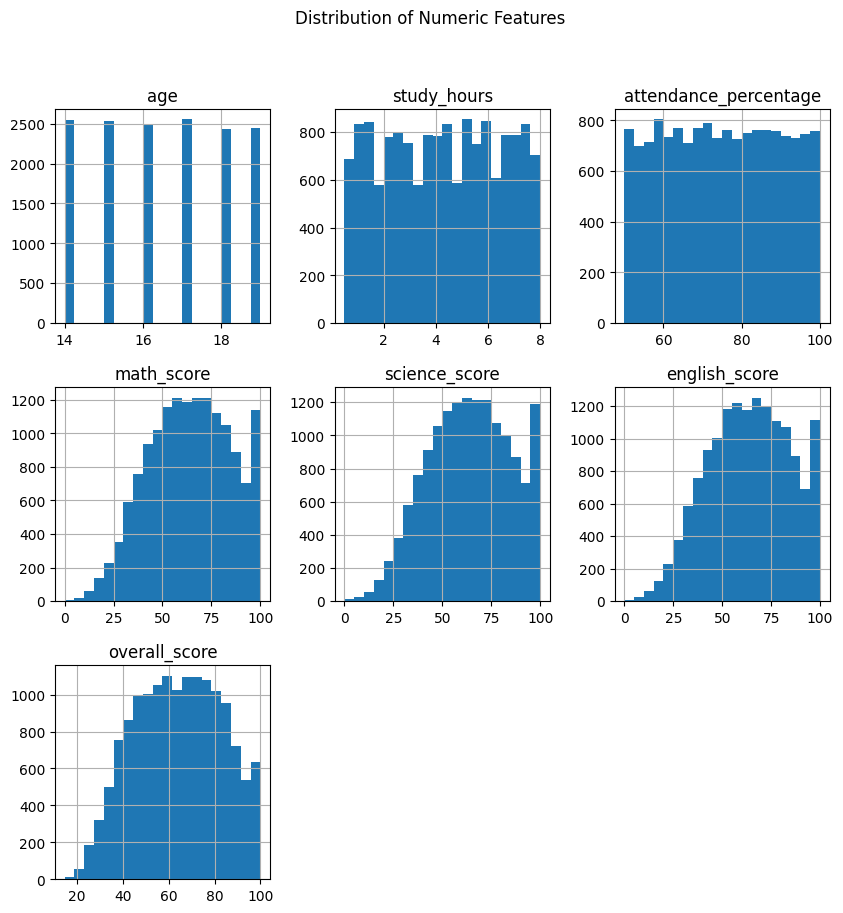

In [154]:
num_cols=['age', 'study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score','overall_score']
df[num_cols].hist(figsize=(10,10),bins=20)
plt.suptitle('Distribution of Numeric Features')
plt.show()


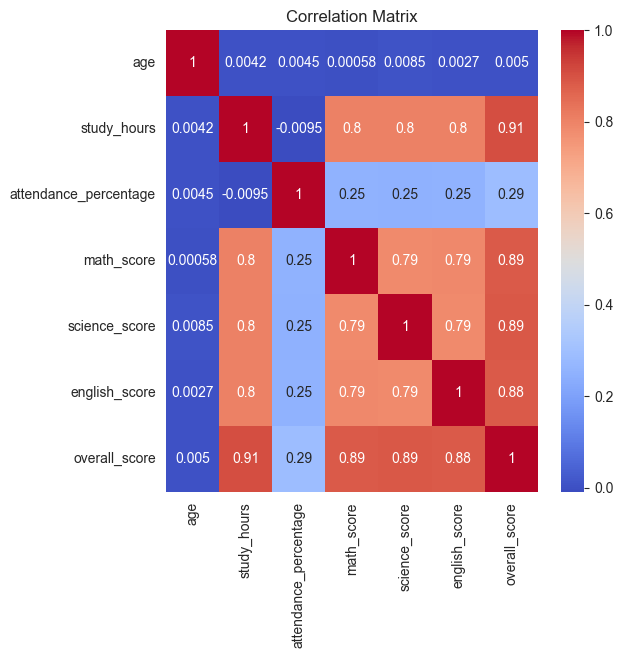

In [159]:
plt.figure(figsize=(6,6))
sns.heatmap(df[num_cols].corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [161]:
print(df.isnull().sum())
print(x.isnull().sum().sum())


student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64
0


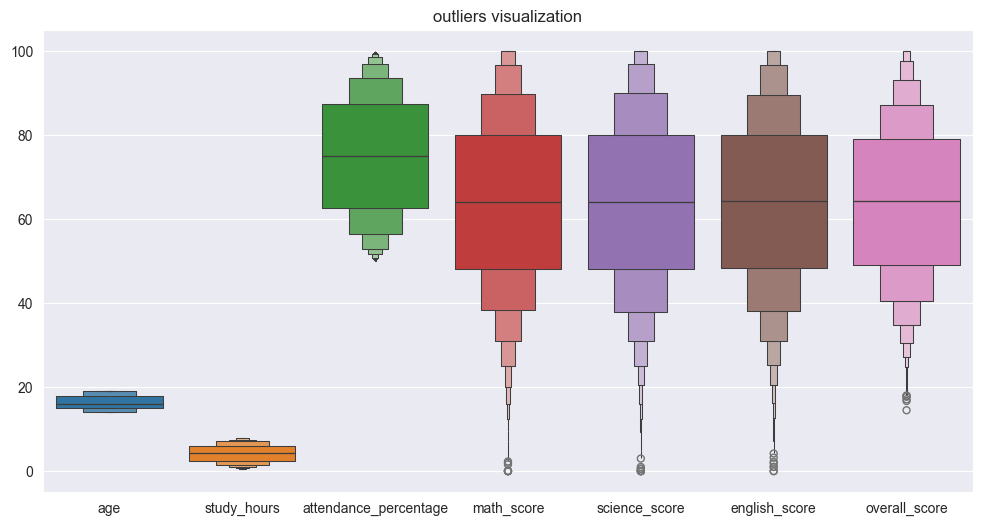

In [163]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df[num_cols])
plt.title('outliers visualization')
plt.show()

In [164]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [172]:
y_pred=regressor.predict(x_test)

In [180]:
score=regressor.score(x_test,y_test)
print(score*100)

95.55524352997128


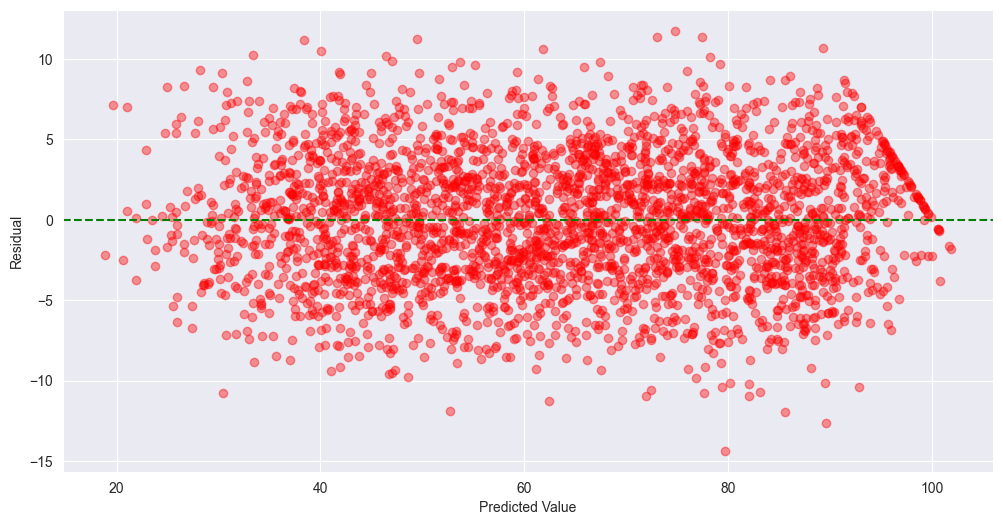

In [189]:
residual=y_test-y_pred
plt.figure(figsize=(12,6))
plt.scatter(y_pred,residual,alpha=0.4,color='r')
plt.axhline(y=0,color='g',linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.show()